Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

## **FLOWER RECOGNITION ASSINGMENT**

**Data Loading & Checking**

In [2]:
import numpy as np
import pandas as pd
from os import listdir
import os
from os.path import join
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [46]:
data= "/content/drive/MyDrive/flowers/flowers"

In [47]:
folders = os.listdir (data)
print(folders)

['rose', 'daisy', 'sunflower', 'dandelion', 'tulip']


In [48]:
category = 'daisy', 'dandelion', 'rose', 'sunflower', 'tulip'

In [155]:
X = []
y = []

**Reading Images**

In [156]:
import cv2
import PIL

In [157]:
size= 100
for file in category:
  link = os.path.join(data, file)
  for img in os.listdir(link):
    image = cv2.imread(os.path.join(link, img), cv2.IMREAD_COLOR)
    try:
      image = cv2.resize(image, (size, size))
    except:
      break
    X.append(np.array(image))
    y.append(str(file))

**Data Visualization**

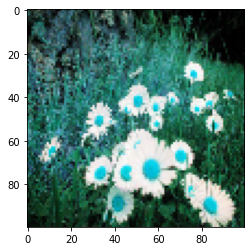

In [158]:
plt.imshow(X[20])
plt.show()

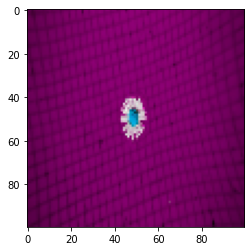

In [159]:
plt.imshow(X[50])
plt.show()

**Converting in numpy array**

In [160]:
X = np.array(X)

In [161]:
X.shape

(4180, 100, 100, 3)

In [162]:
X[0].shape

(100, 100, 3)

In [163]:
X.max()

255

**Encoding the labels**

In [164]:
label = pd.Series(y, index=range(0, 4180))

In [165]:
label

0       daisy
1       daisy
2       daisy
3       daisy
4       daisy
        ...  
4175    tulip
4176    tulip
4177    tulip
4178    tulip
4179    tulip
Length: 4180, dtype: object

In [166]:
label.value_counts()

tulip        984
dandelion    909
rose         784
daisy        769
sunflower    734
dtype: int64

In [167]:
codes = {'daisy':1, 'dandelion':2, 'rose':3, 'sunflower':4, 'tulip':5}

In [168]:
label = label.replace(codes)

In [169]:
label

0       1
1       1
2       1
3       1
4       1
       ..
4175    5
4176    5
4177    5
4178    5
4179    5
Length: 4180, dtype: int64

**Splitting the data**

In [170]:
from sklearn.model_selection import train_test_split
train_sample, test_sample, train_labels, test_labels = train_test_split(X, label, test_size=0.4, random_state=100)

**Normalizing the Data**

In [173]:
print (train_sample.max(), train_sample.max())

255 255


In [174]:
X = X.astype('float32')/255
train_sample = train_sample.astype('float32')/255
test_sample = test_sample.astype('float32')/255

In [175]:
X[0]

array([[[0.03137255, 0.0627451 , 0.02352941],
        [0.        , 0.03921569, 0.00392157],
        [0.00392157, 0.09411765, 0.01176471],
        ...,
        [0.        , 0.01568628, 0.00392157],
        [0.01176471, 0.01960784, 0.01960784],
        [0.01176471, 0.01960784, 0.01960784]],

       [[0.16078432, 0.15686275, 0.13725491],
        [0.26666668, 0.25490198, 0.21568628],
        [0.02352941, 0.08235294, 0.03137255],
        ...,
        [0.03137255, 0.02352941, 0.01176471],
        [0.00392157, 0.02352941, 0.01960784],
        [0.01176471, 0.01176471, 0.01176471]],

       [[0.        , 0.03529412, 0.03921569],
        [0.1254902 , 0.13333334, 0.14117648],
        [0.02745098, 0.07843138, 0.03529412],
        ...,
        [0.00392157, 0.02745098, 0.02745098],
        [0.01568628, 0.01568628, 0.01568628],
        [0.00784314, 0.00784314, 0.00784314]],

       ...,

       [[0.00392157, 0.02745098, 0.        ],
        [0.00392157, 0.2627451 , 0.16470589],
        [0.        , 0

In [176]:
X.shape [0]

4180

In [177]:
y = np.array(y)

In [178]:
y.shape

(4180,)

In [179]:
print(train_sample.shape, train_labels.shape, test_sample.shape, test_labels.shape, X.shape, y.shape)

(2508, 100, 100, 3) (2508,) (1672, 100, 100, 3) (1672,) (4180, 100, 100, 3) (4180,)


**Creating Model**

In [186]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(500, activation='relu', input_shape=(train_sample.shape[1],)))
  model.add(layers.Dense(300, activation='relu'))
  #model.add(layers.Dense(20, activation= 'relu'))
  model.add(layers.Dense(1, activation= 'softmax'))
  return model

In [187]:
model = build_model()

In [188]:
model

In [189]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 500)               50500     
_________________________________________________________________
dense_23 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 301       
Total params: 201,101
Trainable params: 201,101
Non-trainable params: 0
_________________________________________________________________


**Compilation**

In [190]:
model.compile (optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [191]:
history= model.fit(train_sample, train_labels, epochs= 100, batch_size=200, verbose=1)

Epoch 1/100


ValueError: ignored

**Evaluation**

In [ ]:
model.evaluate(test_sample, test_labels)

In [ ]:
print("Loss:", test_loss,end='\n\n')
print("Accuracy:", test_accuracy)

**Model Prediction**

In [ ]:
prediction= model.predict(test_sample)
prediction